In [79]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
df = pd.read_csv('C:\\Users\\ragin\\OneDrive\\Desktop\\Data Science\\SBI_Historical_Data.csv',index_col=0, parse_dates=True,squeeze=False)

In [9]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%
...,...,...,...,...,...,...
2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%
2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%
2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%


In [10]:
df.shape

(1385, 6)

In [12]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1385 entries, 2020-08-07 to 2015-01-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1385 non-null   float64
 1   Open      1385 non-null   float64
 2   High      1385 non-null   float64
 3   Low       1385 non-null   float64
 4   Vol.      1385 non-null   object 
 5   Change %  1385 non-null   object 
dtypes: float64(4), object(2)
memory usage: 75.7+ KB


In [14]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [66]:
df1 = df.iloc[:,0]

In [67]:
df1 = pd.DataFrame(df1)

In [68]:
df1

,Price
Date,
2020-08-07,190.65
2020-08-06,190.95
2020-08-05,191.45
2020-08-04,191.60
2020-08-03,192.25
...,...
2015-01-07,300.15
2015-01-06,299.90
2015-01-05,312.75


<AxesSubplot:xlabel='Date'>

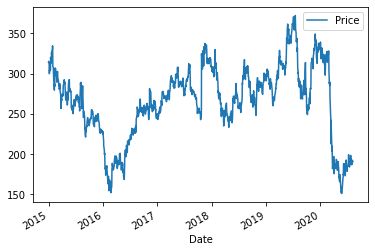

In [21]:
df1.plot()

In [22]:
from statsmodels.tsa.api import seasonal_decompose

In [23]:
import matplotlib.pyplot as plt

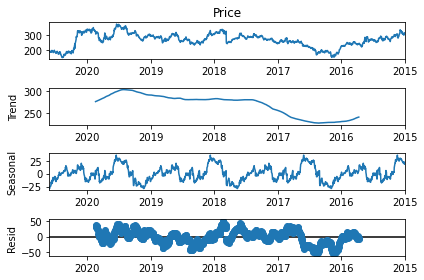

In [27]:
seasonal_decompose(df1.Price,freq = 365).plot()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller
x = df1.Price
result = adfuller(x)
print('ADF Statistic: %.3f' %result[0])
print('p-value:  %f' %result[1])
print('critical values:')
for key,value in result[4].items():
    print('\t%s: %.3f' %(key,abs(value)))

ADF Statistic: -2.684
p-value:  0.076895
critical values:
	1%: 3.435
	5%: 2.864
	10%: 2.568


accept null hypothesis the seies is non stationery

In [29]:
from statsmodels.tsa.stattools import kpss
def kpss_test(df1, **kw):
    statistic,p_value,n_lags,critical_values =kpss(df1, **kw)
    #Format output
    print(f'KPSS Statistics:(statistic)')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical values:')
    for key,value in critical_values.items():
        print(f'{key} : {value}')
    print(f'Result: The series is{"not " if p_value< 0.05 else " "}stationary')

In [30]:
kpss_test(df1)

KPSS Statistics:(statistic)
p-value: 0.01586772267692778
num lags: 24
Critical values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
Result: The series isnot stationary


In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

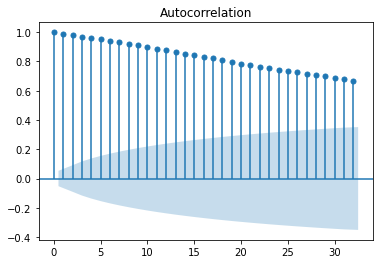

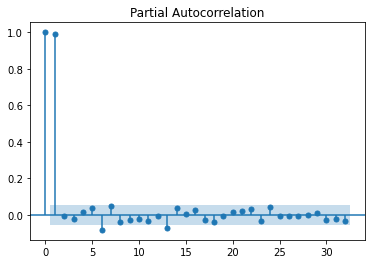

In [32]:
plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

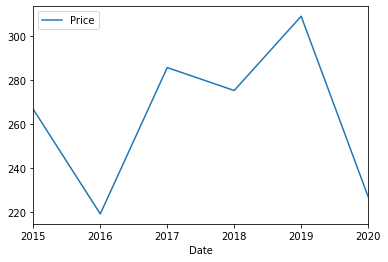

In [34]:
resample = df1.resample('Y')
year_mean = resample.mean()
year_mean.plot()
plt.show()

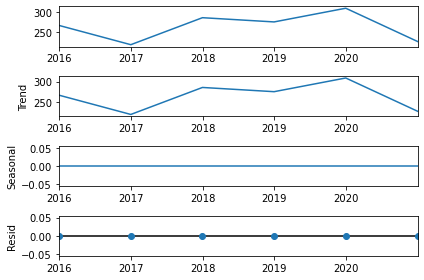

In [35]:
seasonal_decompose(year_mean).plot()
plt.show()

In [116]:
df1['Return'] = df1.Price.pct_change()*100

In [117]:
df1

,Price,Return,forecast
Date,,,
2020-08-07,190.65,NaN,265.316282
2020-08-06,190.95,0.157356,191.268159
2020-08-05,191.45,0.261849,191.574799
2020-08-04,191.60,0.078349,192.081387
2020-08-03,192.25,0.339248,192.237027
...,...,...,...
2015-01-07,300.15,-1.541742,304.470490
2015-01-06,299.90,-0.083292,299.767182
2015-01-05,312.75,4.284762,299.517460


In [118]:
kpss_test(df1.Return.dropna().values)

KPSS Statistics:(statistic)
p-value: 0.1
num lags: 24
Critical values:
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739
Result: The series is stationary


In [119]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [120]:
rownum = -1
aic = []
bic = []
for p in range(0,7):
    for d in range(0,3):
        for q in range(0,7):
            model = ARIMA(df1.Return.dropna().values,order= (p,d,q)).fit()
            rownum+=1
            ai = model.aic
            bi = model.aic
            aic.append(ai)
            bic.append(bi)
            print('%i, AR(%i), I(%i), MA(%i): aic- %f, bic- %f'%(rownum,p,d,q,ai,bi))

0, AR(0), I(0), MA(0): aic- 6234.972273, bic- 6234.972273
1, AR(0), I(0), MA(1): aic- 6236.843023, bic- 6236.843023
2, AR(0), I(0), MA(2): aic- 6237.129331, bic- 6237.129331
3, AR(0), I(0), MA(3): aic- 6239.070328, bic- 6239.070328
4, AR(0), I(0), MA(4): aic- 6237.332066, bic- 6237.332066
5, AR(0), I(0), MA(5): aic- 6231.272250, bic- 6231.272250
6, AR(0), I(0), MA(6): aic- 6224.724937, bic- 6224.724937
7, AR(0), I(1), MA(0): aic- 7203.808631, bic- 7203.808631
8, AR(0), I(1), MA(1): aic- 6240.561844, bic- 6240.561844
9, AR(0), I(1), MA(2): aic- 6242.448353, bic- 6242.448353
10, AR(0), I(1), MA(3): aic- 6242.671841, bic- 6242.671841
11, AR(0), I(1), MA(4): aic- 6244.623924, bic- 6244.623924
12, AR(0), I(1), MA(5): aic- 6242.964613, bic- 6242.964613
13, AR(0), I(1), MA(6): aic- 6236.799575, bic- 6236.799575
14, AR(0), I(2), MA(0): aic- 8737.379637, bic- 8737.379637
15, AR(0), I(2), MA(1): aic- 7208.834317, bic- 7208.834317
16, AR(0), I(2), MA(2): aic- 6261.660655, bic- 6261.660655
17, AR(

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [121]:
aic.index(min(aic)),bic.index(min(bic))

(6, 6)

In [122]:
aic.index(min(aic)),bic.index(min(bic))

(6, 6)

In [126]:
df2 = df1['Return'].dropna().values

In [131]:
df2

array([ 0.15735641,  0.26184865,  0.07834944, ...,  4.28476159,
        0.79936051, -0.39651071])

In [132]:
model = ARIMA(df1['Price'], (1,0,6)).fit()

In [133]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1385
Model:                     ARMA(1, 6)   Log Likelihood               -4433.463
Method:                       css-mle   S.D. of innovations              5.933
Date:                Mon, 15 Mar 2021   AIC                           8884.926
Time:                        13:02:40   BIC                           8932.027
Sample:                             0   HQIC                          8902.542
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         264.1245     18.363     14.383      0.000     228.133     300.116
ar.L1.Price     0.9919      0.004    279.461      0.000       0.985       0.999
ma.L1.Price     0.0146      0.027      0.541      0.589      -0.038       0.068
ma.L2.Price     0.0209      0.027      0.771      0.441      -0.032       0.074
ma.L3.Price    -0.0114      0.027     -0.424      0.672      -0.064       0.041
ma.L4.Price    -0.0341      0.026     -1.300      0.194      -0.085       0.017
ma.L5.Price     0.0751      0.026      2.885      0.004       0.024       0.126
ma.L6.Price    -0.0558      0.025     -2.191      0.028      -0.106      -0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0082           +0.0000j            1.0082            0.0000
MA.1           -1.4263           -0.0000j            1.4263           -0.5000
MA.2           -0.5809           -1.3646j            1.4831           -0.3140
MA.3           -0.5809           +1.3646j            1.4831            0.3140
MA.4            1.8542           -0.0000j            1.8542           -0.0000
MA.5            1.0395           -1.4135j            1.7546           -0.1491
MA.6            1.0395           +1.4135j            1.7546            0.1491
-----------------------------------------------------------------------------
"""

In [134]:
df1['forecast']= model.predict()

<AxesSubplot:xlabel='Date'>

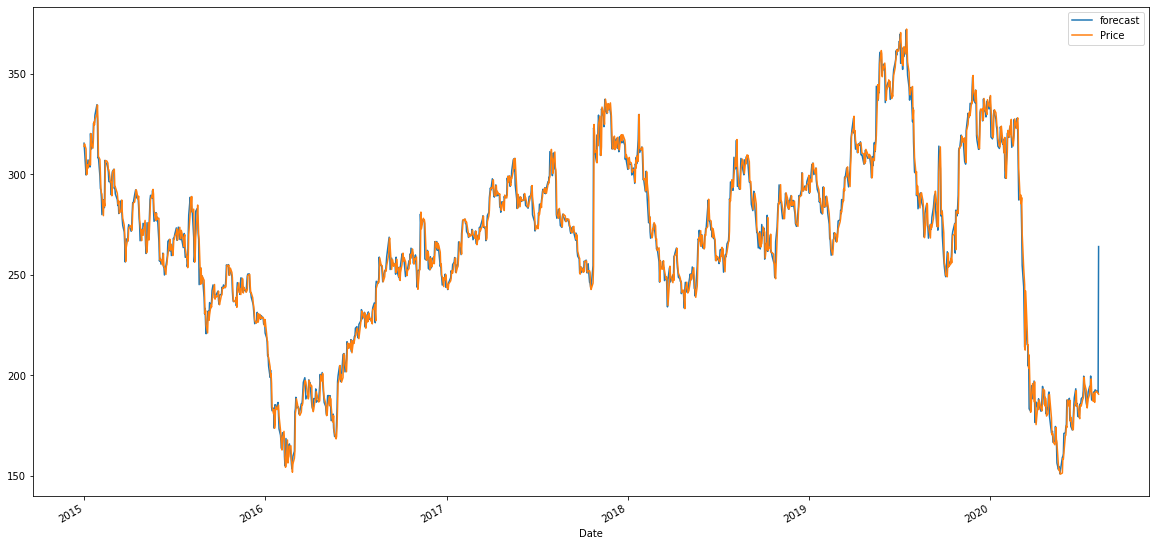

In [135]:
df1[['forecast','Price']].plot(figsize=(20,10))

In [138]:
def bais(x,y):
    return y.mean()
def mae(x,y):
    return abs(y).mean()
def mape(x,y):
    return (abs(y)/x).mean()*100

In [139]:
mape(df1.Price,model.resid)

1.632149596321542